# Importing Libraries

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Plotting two geo dataframes (ward shape file and branch longs/lats)

In [3]:
# SHAPE FILE for the 44 wards of Toronto
# sourced from - https://www1.toronto.ca/wps/portal/contentonly?vgnextoid=b1533f0aacaaa210VgnVCM1000006cd60f89RCRD
wards = gpd.read_file('wards_may2010/tcl3_icitw.shp')

In [4]:
wards.head(1)

,CREATE_ID,GEO_ID,LCODE_NAME,NAME,OBJECTID,SCODE_NAME,SHAPE_AREA,SHAPE_LEN,TYPE_CODE,TYPE_DESC,geometry
0,63519,14630026,EA41,Scarborough-Rouge River (41),1,41,0.0,0.0,CITW,Ward,"POLYGON ((323712.401 4848647.35, 323704.584 48..."


In [5]:
#Confirm 44 wards in Toronto
wards.shape

(44, 11)

In [6]:
#DIGITAL DATA FROM TORONTO LIBRARY
df = pd.read_excel('eProduct_Symphony_BranchDetails_201706/BranchBridgeTable.xls')
points = df.apply (lambda row: Point(row.LONGITUDE, row.LATITUDE), axis = 1)
branches = gpd.GeoDataFrame(df, geometry = points)
branches.crs = {'init': 'epsg:4267'}
branches

,Branch No,Branch Code,LATITUDE,LONGITUDE,Machines,Area,District,Branch Name,Branch Name 2,Nbhd Tier,...,NIA2014,Branch Address,Branch Telephone,City Councillor 2014-2018,FSA,Prov,RealBranch,Ward No,Ward Region,geometry
0,110,LD,NaN,NaN,NaN,CWS,CWS,Adult Literacy Department,Adult Literacy Department,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,POINT (nan nan)
1,1,AG,43.786081,-79.291331,47.0,Agincourt-Barbara Frum-Fairview,Agincourt,Agincourt,Agincourt,District,...,0.0,155 Bonis Ave,(416) 396-8943,Norm Kelly,M1T,ON,1,40.0,Scarborough Agincourt,POINT (-79.291331 43.786081)
2,2,ACD,43.708592,-79.268811,36.0,Albert Campbell-Cedarbrae-Malvern,Albert Campbell,Albert Campbell,Albert Campbell,District,...,1.0,496 Birchmount Rd,(416) 396-8890,Michelle Berardinetti,M1K,ON,1,35.0,Scarborough Southwest,POINT (-79.2688109999999 43.70859200000001)
3,3,AB,43.739691,-79.580803,30.0,Albion-M.A.Shchuka-York Woods,Albion,Albion,Albion,District,...,1.0,1515 Albion Rd,(416) 394-5170,Vincent Crisanti,M9V,ON,1,1.0,Etobicoke North,POINT (-79.580803 43.739691)
4,4,AD,43.601535,-79.546548,7.0,Bloor/Gladstone-Brentwood-Richview,Richview,Alderwood,Alderwood,Neighbourhood 2,...,0.0,2 Orianna Dr,(416) 394-5310,Mark Grimes,M8W,ON,1,6.0,Etobicoke Lakeshore,POINT (-79.546548 43.60153499999991)
5,5,AP,43.706986,-79.484822,6.0,Agincourt-Barbara Frum-Fairview,Barbara Frum,Amesbury Park,Amesbury Park,Neighbourhood 3,...,1.0,1565 Lawrence Ave W,(416) 395-5420,Frank Di Giorgio,M6L,ON,1,12.0,York South-Weston,POINT (-79.48482199999989 43.706986)
6,6,AN,43.663523,-79.466283,11.0,Bloor/Gladstone-Brentwood-Richview,Brentwood,Annette Street,Annette Street,Neighbourhood 2,...,0.0,145 Annette St.,(416) 393-7692,Sarah Doucette,M6P,ON,1,13.0,Parkdale-High Park,POINT (-79.46628300000002 43.66352299999991)
7,102,AL,NaN,NaN,NaN,NaN,NaN,Answerline,Answerline,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,POINT (nan nan)
8,7,AH,43.738672,-79.421163,5.0,Agincourt-Barbara Frum-Fairview,Barbara Frum,Armour Heights,Armour Heights,Neighbourhood 3,...,0.0,2140 Avenue Rd,(416) 395-5430,Christin Carmichael Greb,M5M,ON,1,16.0,Eglinton-Lawrence,POINT (-79.42116300000002 43.73867200000001)
9,113,PR,NaN,NaN,NaN,RS,RS,Automated Phone System,Automated Phone System,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,POINT (nan nan)


In [7]:
df.shape

(125, 30)

In [8]:
branches.shape

(125, 30)

# Mapping the library branches over the wards to see if any wards are 'library dead zones'

In [9]:
#The city of Toronto used NAD27 as their datum, we should likely use the same for the branches (epsg = 4267)
wards.crs

{'datum': 'NAD27',
 'k': 0.9999,
 'lat_0': 0,
 'lon_0': -79.5,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 304800,
 'y_0': 0}

(291459.75695000001, 337856.13005000004, 4825036.63105, 4858633.8199499995)

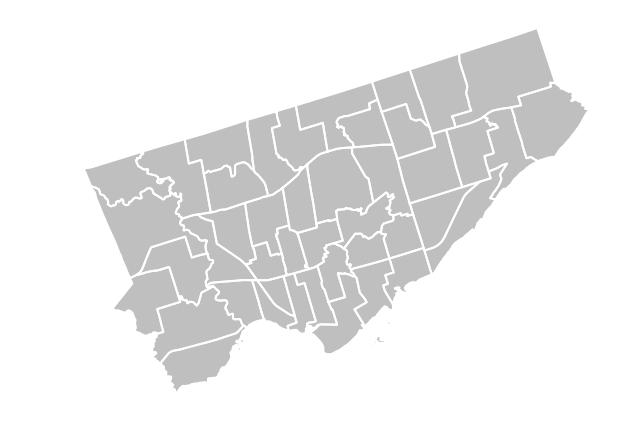

In [10]:
ax = wards.plot(figsize=(10,10),color = 'grey', edgecolor = 'white', linewidth = 2)
ax.axis('off')

(-79.643892750000006,
 -79.115150249999999,
 43.582846950000004,
 43.836332049999896)

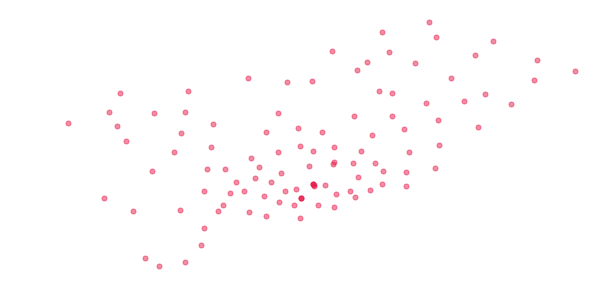

In [11]:
ax = branches.plot(figsize=(10,10), color='#E81B49', markersize = 5, alpha= 0.5)
ax.axis('off')

In [12]:
# Set the CRS to be the same for branches and wards
wards.to_crs(branches.crs, inplace=True)

In [13]:
branches.crs

{'init': 'epsg:4267'}

In [14]:
wards.crs

{'init': 'epsg:4267'}

In [15]:
wards.head()

,CREATE_ID,GEO_ID,LCODE_NAME,NAME,OBJECTID,SCODE_NAME,SHAPE_AREA,SHAPE_LEN,TYPE_CODE,TYPE_DESC,geometry
0,63519,14630026,EA41,Scarborough-Rouge River (41),1,41,0.0,0.0,CITW,Ward,POLYGON ((-79.26505436013277 43.77948980747296...
1,63519,14630028,EA44,Scarborough East (44),2,44,0.0,0.0,CITW,Ward,POLYGON ((-79.17097116619559 43.75557000302067...
2,63519,14630024,EA42,Scarborough-Rouge River (42),3,42,0.0,0.0,CITW,Ward,POLYGON ((-79.22588463379613 43.78933660104191...
3,63519,14630027,EA39,Scarborough-Agincourt (39),4,39,0.0,0.0,CITW,Ward,POLYGON ((-79.33161155129696 43.79305194915877...
4,63519,14630035,NO24,Willowdale (24),5,24,0.0,0.0,CITW,Ward,POLYGON ((-79.38739080355791 43.76341495875854...


(-79.665656084121878,
 -79.089251276589906,
 43.567216669092367,
 43.869123267523932)

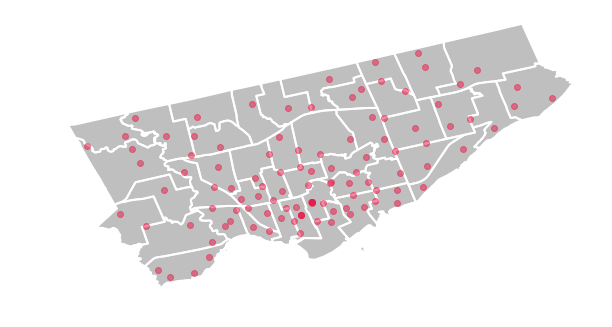

In [16]:
#2 of the 44 wards in Toronto don't have any branches inside their boundaries
ax = wards.plot(figsize=(10,10),color = 'grey', edgecolor = 'white', linewidth = 2)
ax = branches.plot(figsize=(10,10), color='#E81B49', markersize = 6, alpha= 0.5, ax=ax)
ax.axis('off')

# Spatially joining wards with branches

In [17]:
branches

,Branch No,Branch Code,LATITUDE,LONGITUDE,Machines,Area,District,Branch Name,Branch Name 2,Nbhd Tier,...,NIA2014,Branch Address,Branch Telephone,City Councillor 2014-2018,FSA,Prov,RealBranch,Ward No,Ward Region,geometry
0,110,LD,NaN,NaN,NaN,CWS,CWS,Adult Literacy Department,Adult Literacy Department,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,POINT (nan nan)
1,1,AG,43.786081,-79.291331,47.0,Agincourt-Barbara Frum-Fairview,Agincourt,Agincourt,Agincourt,District,...,0.0,155 Bonis Ave,(416) 396-8943,Norm Kelly,M1T,ON,1,40.0,Scarborough Agincourt,POINT (-79.291331 43.786081)
2,2,ACD,43.708592,-79.268811,36.0,Albert Campbell-Cedarbrae-Malvern,Albert Campbell,Albert Campbell,Albert Campbell,District,...,1.0,496 Birchmount Rd,(416) 396-8890,Michelle Berardinetti,M1K,ON,1,35.0,Scarborough Southwest,POINT (-79.2688109999999 43.70859200000001)
3,3,AB,43.739691,-79.580803,30.0,Albion-M.A.Shchuka-York Woods,Albion,Albion,Albion,District,...,1.0,1515 Albion Rd,(416) 394-5170,Vincent Crisanti,M9V,ON,1,1.0,Etobicoke North,POINT (-79.580803 43.739691)
4,4,AD,43.601535,-79.546548,7.0,Bloor/Gladstone-Brentwood-Richview,Richview,Alderwood,Alderwood,Neighbourhood 2,...,0.0,2 Orianna Dr,(416) 394-5310,Mark Grimes,M8W,ON,1,6.0,Etobicoke Lakeshore,POINT (-79.546548 43.60153499999991)
5,5,AP,43.706986,-79.484822,6.0,Agincourt-Barbara Frum-Fairview,Barbara Frum,Amesbury Park,Amesbury Park,Neighbourhood 3,...,1.0,1565 Lawrence Ave W,(416) 395-5420,Frank Di Giorgio,M6L,ON,1,12.0,York South-Weston,POINT (-79.48482199999989 43.706986)
6,6,AN,43.663523,-79.466283,11.0,Bloor/Gladstone-Brentwood-Richview,Brentwood,Annette Street,Annette Street,Neighbourhood 2,...,0.0,145 Annette St.,(416) 393-7692,Sarah Doucette,M6P,ON,1,13.0,Parkdale-High Park,POINT (-79.46628300000002 43.66352299999991)
7,102,AL,NaN,NaN,NaN,NaN,NaN,Answerline,Answerline,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,POINT (nan nan)
8,7,AH,43.738672,-79.421163,5.0,Agincourt-Barbara Frum-Fairview,Barbara Frum,Armour Heights,Armour Heights,Neighbourhood 3,...,0.0,2140 Avenue Rd,(416) 395-5430,Christin Carmichael Greb,M5M,ON,1,16.0,Eglinton-Lawrence,POINT (-79.42116300000002 43.73867200000001)
9,113,PR,NaN,NaN,NaN,RS,RS,Automated Phone System,Automated Phone System,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,POINT (nan nan)


In [18]:
branches.shape

(125, 30)

In [19]:
#DROPPING NAN VALUES
branches.dropna(inplace=True)
pd.set_option("display.max_columns", 100)
branches

,Branch No,Branch Code,LATITUDE,LONGITUDE,Machines,Area,District,Branch Name,Branch Name 2,Nbhd Tier,Tier,Youth Hub,Square Footage,facility_master_id,Branch Postal Code,FacilityID,OverDrive Branch,NBHD Name,NBHD No,City,NIA2014,Branch Address,Branch Telephone,City Councillor 2014-2018,FSA,Prov,RealBranch,Ward No,Ward Region,geometry
1,1,AG,43.786081,-79.291331,47.0,Agincourt-Barbara Frum-Fairview,Agincourt,Agincourt,Agincourt,District,DL,No,27000.0,4.0,M1T3W6,1024.0,Agincourt (Toronto Public Library),Tam O'Shanter-Sullivan,118.0,Scarborough,0.0,155 Bonis Ave,(416) 396-8943,Norm Kelly,M1T,ON,1,40.0,Scarborough Agincourt,POINT (-79.291331 43.786081)
2,2,ACD,43.708592,-79.268811,36.0,Albert Campbell-Cedarbrae-Malvern,Albert Campbell,Albert Campbell,Albert Campbell,District,DL,No,26100.0,7.0,M1K1N8,1025.0,Albert Campbell (Toronto Public Library),Clairlea-Birchmount,120.0,Scarborough,1.0,496 Birchmount Rd,(416) 396-8890,Michelle Berardinetti,M1K,ON,1,35.0,Scarborough Southwest,POINT (-79.2688109999999 43.70859200000001)
3,3,AB,43.739691,-79.580803,30.0,Albion-M.A.Shchuka-York Woods,Albion,Albion,Albion,District,DL,No,32279.0,5.0,M9V1B2,1026.0,Albion (Toronto Public Library),Mount Olive-Silverstone-Jamestown,2.0,Etobicoke,1.0,1515 Albion Rd,(416) 394-5170,Vincent Crisanti,M9V,ON,1,1.0,Etobicoke North,POINT (-79.580803 43.739691)
6,6,AN,43.663523,-79.466283,11.0,Bloor/Gladstone-Brentwood-Richview,Brentwood,Annette Street,Annette Street,Neighbourhood 2,NL,No,7806.0,1.0,M6P1P3,1029.0,Annette (Toronto Public Library),Junction Area,90.0,Toronto,0.0,145 Annette St.,(416) 393-7692,Sarah Doucette,M6P,ON,1,13.0,Parkdale-High Park,POINT (-79.46628300000002 43.66352299999991)
10,8,BF,43.720534,-79.432206,32.0,Agincourt-Barbara Frum-Fairview,Barbara Frum,Barbara Frum,Barbara Frum,District,DL,No,39223.0,3.0,M6A3C1,1031.0,Barbara Frum (Toronto Public Library),Englemount-Lawrence,32.0,North York,0.0,20 Covington Rd,(416) 395-5440,Josh Colle,M6A,ON,1,15.0,Eglinton-Lawrence,POINT (-79.43220599999989 43.72053400000001)
12,10,BE,43.670206,-79.299225,12.0,Don Mills-Pape/Danforth-S.W.Stewart,Pape/Danforth,Beaches,Beaches,Neighbourhood 2,NL,No,8000.0,79.0,M4L1J1,1033.0,Beaches (Toronto Public Library),The Beaches,63.0,Toronto,0.0,2161 Queen St E,(416) 393-7703,Mary‐Margaret McMahon,M4L,ON,1,32.0,Beaches-East York,POINT (-79.29922500000002 43.670206)
13,11,BD,43.749980,-79.244444,9.0,Albert Campbell-Cedarbrae-Malvern,Cedarbrae,Bendale,Bendale,Neighbourhood 3,NL,No,8500.0,11.0,M1J1H5,1034.0,Bendale (Toronto Public Library),Bendale,127.0,Scarborough,1.0,1515 Danforth Rd,(416) 396-8910,Glenn De Baeremaeker,M1J,ON,1,38.0,Scarborough Centre,POINT (-79.24444400000002 43.74998)
15,12,BC,43.720155,-79.512617,6.0,Albion-M.A.Shchuka-York Woods,York Woods,Black Creek,Black Creek,Neighbourhood 3,NL,No,5782.0,55.0,M3L1B2,1035.0,Black Creek (Toronto Public Library),Downsview-Roding-CFB,26.0,North York,1.0,"1700 Wilson Ave, Unit 63-64",(416) 395-5470,Giorgio Mammoliti,M3L,ON,1,7.0,York West,POINT (-79.51261700000001 43.72015499999991)
16,13,BL,43.660049,-79.434382,44.0,Bloor/Gladstone-Brentwood-Richview,Bloor/Gladstone,Bloor/Gladstone,Bloor/Gladstone,District,DL,No,20627.0,2.0,M6H1M7,1036.0,Bloor/Gladstone (Toronto Public Library),Dufferin Grove,83.0,Toronto,0.0,1101 Bloor St W,(416) 393-7674,Ana Bailão,M6H,ON,1,18.0,Davenport,POINT (-79.4343819999999 43.660049)
19,14,BR,43.647108,-79.513883,40.0,Bloor/Gladstone-Brentwood-Richview,Brentwood,Brentwood,Brentwood,District,DL,No,17500.0,8.0,M8X2B5,1037.0,Brentwood (Toronto Public Library),Kingsway South,15.0,Etobicoke,0.0,36 Brentwood Rd N,(416) 394-5240,Justin Di Ciano,M8X,ON,1,5.0,Etobicoke Lakeshore,POINT (-79.51388300000001 43.647108)


In [20]:
#We want to keep every single row in the branches data set even if it isn't in a ward
branches_within_wards = gpd.sjoin(branches.reset_index(), wards, how='left', op='contains')
branches_within_wards.head()

,index,Branch No,Branch Code,LATITUDE,LONGITUDE,Machines,Area,District,Branch Name,Branch Name 2,Nbhd Tier,Tier,Youth Hub,Square Footage,facility_master_id,Branch Postal Code,FacilityID,OverDrive Branch,NBHD Name,NBHD No,City,NIA2014,Branch Address,Branch Telephone,City Councillor 2014-2018,FSA,Prov,RealBranch,Ward No,Ward Region,geometry,index_right,CREATE_ID,GEO_ID,LCODE_NAME,NAME,OBJECTID,SCODE_NAME,SHAPE_AREA,SHAPE_LEN,TYPE_CODE,TYPE_DESC
0,1,1,AG,43.786081,-79.291331,47.0,Agincourt-Barbara Frum-Fairview,Agincourt,Agincourt,Agincourt,District,DL,No,27000.0,4.0,M1T3W6,1024.0,Agincourt (Toronto Public Library),Tam O'Shanter-Sullivan,118.0,Scarborough,0.0,155 Bonis Ave,(416) 396-8943,Norm Kelly,M1T,ON,1,40.0,Scarborough Agincourt,POINT (-79.291331 43.786081),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,ACD,43.708592,-79.268811,36.0,Albert Campbell-Cedarbrae-Malvern,Albert Campbell,Albert Campbell,Albert Campbell,District,DL,No,26100.0,7.0,M1K1N8,1025.0,Albert Campbell (Toronto Public Library),Clairlea-Birchmount,120.0,Scarborough,1.0,496 Birchmount Rd,(416) 396-8890,Michelle Berardinetti,M1K,ON,1,35.0,Scarborough Southwest,POINT (-79.2688109999999 43.70859200000001),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,AB,43.739691,-79.580803,30.0,Albion-M.A.Shchuka-York Woods,Albion,Albion,Albion,District,DL,No,32279.0,5.0,M9V1B2,1026.0,Albion (Toronto Public Library),Mount Olive-Silverstone-Jamestown,2.0,Etobicoke,1.0,1515 Albion Rd,(416) 394-5170,Vincent Crisanti,M9V,ON,1,1.0,Etobicoke North,POINT (-79.580803 43.739691),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,6,AN,43.663523,-79.466283,11.0,Bloor/Gladstone-Brentwood-Richview,Brentwood,Annette Street,Annette Street,Neighbourhood 2,NL,No,7806.0,1.0,M6P1P3,1029.0,Annette (Toronto Public Library),Junction Area,90.0,Toronto,0.0,145 Annette St.,(416) 393-7692,Sarah Doucette,M6P,ON,1,13.0,Parkdale-High Park,POINT (-79.46628300000002 43.66352299999991),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,8,BF,43.720534,-79.432206,32.0,Agincourt-Barbara Frum-Fairview,Barbara Frum,Barbara Frum,Barbara Frum,District,DL,No,39223.0,3.0,M6A3C1,1031.0,Barbara Frum (Toronto Public Library),Englemount-Lawrence,32.0,North York,0.0,20 Covington Rd,(416) 395-5440,Josh Colle,M6A,ON,1,15.0,Eglinton-Lawrence,POINT (-79.43220599999989 43.72053400000001),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
branches_within_wards.shape

(76, 42)

In [22]:
branches.shape

(76, 30)

In [23]:
wards.shape

(44, 11)

In [24]:
#Sent to library to confirm ward assignments for a few branches (didn't match the ward assignment we get from the sjoin)
df.to_csv("branches_within_wards.csv", index=False)

# Taking our spatially joined df and merging with circulation dataset

In [25]:
eProducts = pd.read_excel('eProduct_Symphony_BranchDetails_201706/eProduct_CirculationActivityDetail-201706.xlsx')
eProducts.dtypes

Title                            object
Edition                          object
Creator                          object
Language                         object
Audience/Rating                  object
Subject                          object
Format                           object
Publisher                        object
Date Added to site       datetime64[ns]
Own                              object
Lic. purchased                   object
Lic. left                        object
Lic. used                        object
Checkout ID                      object
Branch                           object
Checked out              datetime64[ns]
Lending period                    int64
Borrowed from                    object
Bought by                        object
Renewal                          object
Content access levels            object
Barcode                           int64
Extra1                          float64
Extra2                          float64
Extra3                          float64


In [26]:
eProducts.head(3)

,Title,Edition,Creator,Language,Audience/Rating,Subject,Format,Publisher,Date Added to site,Own,Lic. purchased,Lic. left,Lic. used,Checkout ID,Branch,Checked out,Lending period,Borrowed from,Bought by,Renewal,Content access levels,Barcode,Extra1,Extra2,Extra3,Extra4,Extra5
0,A Rare Chance,NaN,Carla Neggers,English,Adult Fiction,"Fiction, Romance",eBook,"Simon & Schuster, Inc.",2014-11-20,2,-,-,-,243-893802-00090,Richview (Toronto Public Library),2017-06-22,21,Main collection,Cons.,No,Adult,27131004049930,NaN,NaN,NaN,NaN,NaN
1,A Rare Chance,NaN,Carla Neggers,English,Adult Fiction,"Fiction, Romance",eBook,"Simon & Schuster, Inc.",2014-11-20,2,-,-,-,243-928875-00048,Thorncliffe (Toronto Public Library),2017-06-04,21,Main collection,Cons.,No,Adult,27131022681904,NaN,NaN,NaN,NaN,NaN
2,The Balance of Guilt,NaN,Simon Hall,English,Adult Fiction,"Fiction, Mystery",eBook,"Simon & Schuster, Inc.",2017-01-24,1,-,-,-,243-854927-00653,Swansea Memorial (Toronto Public Library),2017-06-04,21,Main collection,Cons.,No,Adult,27131004087179,NaN,NaN,NaN,NaN,NaN


In [27]:
#Checking to see if the "Branch" column from ebooks df matches "OverDrive Branch" column from the branches_within_wards df
eProducts[eProducts['Branch'].str.contains("Annette", na=False)]

,Title,Edition,Creator,Language,Audience/Rating,Subject,Format,Publisher,Date Added to site,Own,Lic. purchased,Lic. left,Lic. used,Checkout ID,Branch,Checked out,Lending period,Borrowed from,Bought by,Renewal,Content access levels,Barcode,Extra1,Extra2,Extra3,Extra4,Extra5
25,The Thread of Evidence,NaN,Bernard Knight,English,Adult Fiction,"Fiction, Mystery",eBook,"Simon & Schuster, Inc.",2015-12-30,1,-,-,-,243-939834-00611,Annette (Toronto Public Library),2017-06-09,21,Main collection,Cons.,No,Adult,27131026249526,NaN,NaN,NaN,NaN,NaN
53,The $100 Startup: Reinvent the Way You Make a ...,NaN,Chris Guillebeau,English,Adult Nonfiction,"Business, Nonfiction, Self-Improvement",eBook,"Random House, Inc.",2012-05-07,20,-,-,-,243-1164333-00008,Annette (Toronto Public Library),2017-06-18,21,Main collection,Cons.,No,Adult,27131021700176,NaN,NaN,NaN,NaN,NaN
203,«Тайна Наполеона»: Книга 7. Фаворитка Наполеона.,NaN,Эдмонд Адольф де Лепеллетье де Буэлье,Russian,Adult Fiction,"Fiction, Historical Fiction, Romance",eBook,Aegitas,2000-01-01,1,-,-,-,243-990457-00790,Annette (Toronto Public Library),2017-06-11,21,Main collection,Cons.,No,Adult,27131029844679,NaN,NaN,NaN,NaN,NaN
340,The 4 Disciplines of Execution: Achieving Your...,NaN,Sean Covey,English,Adult Nonfiction,"Business, Nonfiction, Self-Improvement",eBook,"Simon & Schuster, Inc.",2014-12-02,3,-,-,-,243-1293579-00048,Annette (Toronto Public Library),2017-06-15,21,Main collection,Cons.,No,Adult,27131038458115,NaN,NaN,NaN,NaN,NaN
427,The 5 Essential People Skills: How to Assert Y...,NaN,Dale Carnegie Training,English,Adult Nonfiction,"Business, Nonfiction",eBook,"Simon & Schuster, Inc.",2014-12-08,4,-,-,-,243-1436503-00018,Annette (Toronto Public Library),2017-06-07,21,Main collection,Cons.,No,Adult,27131034624587,NaN,NaN,NaN,NaN,NaN
489,5 Pounds: The Breakthrough 5-day Plan to Jumps...,NaN,Harley Pasternak,English,Adult Nonfiction,"Health & Fitness, Nonfiction",eBook,"Penguin Group (USA), Inc.",2015-04-11,2,-,-,-,243-357363-00110,Annette (Toronto Public Library),2017-06-18,21,Main collection,Cons.,No,Adult,27131018023111,NaN,NaN,NaN,NaN,NaN
532,"6 Rainier Drive: Cedar Cove Series, Book 6",NaN,Debbie Macomber,English,Adult Fiction,"Fiction, Romance",eBook,"Harlequin Enterprises, Ltd.",2010-10-22,3,-,-,-,243-1094197-00126,Annette (Toronto Public Library),2017-06-18,21,Main collection,Cons.,No,"Adult, Juvenile",27131030598702,NaN,NaN,NaN,NaN,NaN
734,"8 Sandpiper Way: Cedar Cove Series, Book 8",NaN,Debbie Macomber,English,Adult Fiction,"Fiction, Romance",eBook,"Harlequin Enterprises, Ltd.",2009-04-07,6,-,-,-,243-1094197-00131,Annette (Toronto Public Library),2017-06-29,14,Main collection,Cons.,No,"Adult, Juvenile",27131030598702,NaN,NaN,NaN,NaN,NaN
782,The 10 Habits of Happy Mothers: Reclaiming Our...,Unabridged,Meg Meeker,English,Adult Nonfiction,Nonfiction,Audiobook,"Tantor Media, Inc",2011-05-18,4,-,-,-,243-919144-00121,Annette (Toronto Public Library),2017-06-02,21,Main collection,Cons.,No,Adult,27131011525070,NaN,NaN,NaN,NaN,NaN
784,The 10 Habits of Happy Mothers: Reclaiming Our...,NaN,Meg Meeker,English,Adult Nonfiction,"Family & Relationships, Nonfiction, Self-Impro...",eBook,"Random House, Inc.",2015-09-05,3,-,-,-,243-919144-00125,Annette (Toronto Public Library),2017-06-12,21,Main collection,Cons.,No,Adult,27131011525070,NaN,NaN,NaN,NaN,NaN


In [28]:
branches_eProducts = branches_within_wards.merge(eProducts, left_on="OverDrive Branch", right_on="Branch")
branches_eProducts.head()

,index,Branch No,Branch Code,LATITUDE,LONGITUDE,Machines,Area,District,Branch Name,Branch Name 2,Nbhd Tier,Tier,Youth Hub,Square Footage,facility_master_id,Branch Postal Code,FacilityID,OverDrive Branch,NBHD Name,NBHD No,City,NIA2014,Branch Address,Branch Telephone,City Councillor 2014-2018,FSA,Prov,RealBranch,Ward No,Ward Region,geometry,index_right,CREATE_ID,GEO_ID,LCODE_NAME,NAME,OBJECTID,SCODE_NAME,SHAPE_AREA,SHAPE_LEN,TYPE_CODE,TYPE_DESC,Title,Edition,Creator,Language,Audience/Rating,Subject,Format,Publisher,Date Added to site,Own,Lic. purchased,Lic. left,Lic. used,Checkout ID,Branch,Checked out,Lending period,Borrowed from,Bought by,Renewal,Content access levels,Barcode,Extra1,Extra2,Extra3,Extra4,Extra5
0,1,1,AG,43.786081,-79.291331,47.0,Agincourt-Barbara Frum-Fairview,Agincourt,Agincourt,Agincourt,District,DL,No,27000.0,4.0,M1T3W6,1024.0,Agincourt (Toronto Public Library),Tam O'Shanter-Sullivan,118.0,Scarborough,0.0,155 Bonis Ave,(416) 396-8943,Norm Kelly,M1T,ON,1,40.0,Scarborough Agincourt,POINT (-79.291331 43.786081),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Hot 2 Handle,NaN,Kelly Jamieson,English,Adult Fiction,"Fiction, Romance",eBook,"Samhain Publishing, Ltd.",2017-02-23,3,-,-,-,243-846338-00459,Agincourt (Toronto Public Library),2017-06-01,21,Main collection,Cons.,No,Adult,27131026255895,NaN,NaN,NaN,NaN,NaN
1,1,1,AG,43.786081,-79.291331,47.0,Agincourt-Barbara Frum-Fairview,Agincourt,Agincourt,Agincourt,District,DL,No,27000.0,4.0,M1T3W6,1024.0,Agincourt (Toronto Public Library),Tam O'Shanter-Sullivan,118.0,Scarborough,0.0,155 Bonis Ave,(416) 396-8943,Norm Kelly,M1T,ON,1,40.0,Scarborough Agincourt,POINT (-79.291331 43.786081),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The 3 Simple Rules of Investing: Why Everythin...,NaN,Michael Edesess,English,Adult Nonfiction,"Business, Finance, Nonfiction",eBook,"Berrett-Koehler Publishers, Inc.",2014-05-09,9,-,-,-,243-747422-00171,Agincourt (Toronto Public Library),2017-06-30,7,Main collection,Cons.,No,Adult,27131017392251,NaN,NaN,NaN,NaN,NaN
2,1,1,AG,43.786081,-79.291331,47.0,Agincourt-Barbara Frum-Fairview,Agincourt,Agincourt,Agincourt,District,DL,No,27000.0,4.0,M1T3W6,1024.0,Agincourt (Toronto Public Library),Tam O'Shanter-Sullivan,118.0,Scarborough,0.0,155 Bonis Ave,(416) 396-8943,Norm Kelly,M1T,ON,1,40.0,Scarborough Agincourt,POINT (-79.291331 43.786081),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 Tales of Avarice (Unabridged),Unabridged,Sir Arthur Conan Doyle,English,Adult Fiction,"Fiction, Mystery, Short Stories",Audiobook,"Blackstone Audio, Inc.",2016-08-04,3,-,-,-,243-1389171-00060,Agincourt (Toronto Public Library),2017-06-17,21,Main collection,Cons.,No,Adult,27131039123221,NaN,NaN,NaN,NaN,NaN
3,1,1,AG,43.786081,-79.291331,47.0,Agincourt-Barbara Frum-Fairview,Agincourt,Agincourt,Agincourt,District,DL,No,27000.0,4.0,M1T3W6,1024.0,Agincourt (Toronto Public Library),Tam O'Shanter-Sullivan,118.0,Scarborough,0.0,155 Bonis Ave,(416) 396-8943,Norm Kelly,M1T,ON,1,40.0,Scarborough Agincourt,POINT (-79.291331 43.786081),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The 4 x 4 Diet: 4 Key Foods, 4-Minute Workouts...",NaN,Erin Oprea,English,Adult Nonfiction,"Health & Fitness, Nonfiction, Self-Improvement",eBook,"Random House, Inc.",2016-01-28,4,-,-,-,243-1418466-00156,Agincourt (Toronto Public Library),2017-06-09,21,Main collection,Cons.,No,Adult,27131040500474,NaN,NaN,NaN,NaN,NaN
4,1,1,AG,43.786081,-79.291331,47.0,Agincourt-Barbara Frum-Fairview,Agincourt,Agincourt,Agincourt,District,DL,No,27000.0,4.0,M1T3W6,1024.0,Agincourt (Toronto Public Library),Tam O'Shanter-Sullivan,118.0,Scarborough,0.0,155 Bonis Ave,(416) 396-8943,Norm Kelly,M1T,ON,1,40.0,Scarborough Agincourt,POINT (-79.291331 43.786081),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The 4 x 4 Diet: 4 Key Foods, 4-Minute Workouts...",NaN,Erin Oprea,English,Adult Nonfiction,"Health & Fitness, Nonfiction, Self-Improvement",eBook,"Random House, Inc.",2016-01-28,4,-,-,-,243-1418466-00179,Agincourt (Toronto Public Library)

In [29]:
#Which library branches have the highest and lowest check outs for eProducts
#eProducts circulation is highest in the NY Central Library branch and lowest at St. Clair/Silverthorn 
branches_eProducts.Branch.value_counts()

North York Central Library (Toronto Public Library)    15905
Toronto Reference Library (Toronto Public Library)     13512
Northern District (Toronto Public Library)              9727
Eatonville (Toronto Public Library)                     8607
Lillian H. Smith (Toronto Public Library)               8419
Pape/Danforth (Toronto Public Library)                  8390
Deer Park (Toronto Public Library)                      7918
Richview (Toronto Public Library)                       7802
Fairview (Toronto Public Library)                       7558
Locke (Toronto Public Library)                          7322
Beaches (Toronto Public Library)                        7218
Runnymede (Toronto Public Library)                      7179
Don Mills (Toronto Public Library)                      7064
Leaside (Toronto Public Library)                        6502
Brentwood (Toronto Public Library)                      6442
Agincourt (Toronto Public Library)                      6428
Barbara Frum (Toronto Pu

In [30]:
#Which city wards have the highest and lowest check outs for eProducts
#eProducts circulation is highest in Willowdale (23) and lowest in York South-Weston (12)
branches_eProducts.NAME.value_counts()

Series([], Name: NAME, dtype: int64)

In [31]:
branches_eProducts.Format.value_counts()

eBook        224944
Audiobook     54567
Video           999
Name: Format, dtype: int64

In [32]:
#Which branches have the greatest eBook check outs? Lowest eBook check outs? 
only_ebooks = branches_eProducts[branches_eProducts['Format'] == 'eBook']
only_audio = branches_eProducts[branches_eProducts['Format'] == 'Audiobook']
only_video = branches_eProducts[branches_eProducts['Format'] == 'Video']
ax = only_ebooks.groupby("NAME")["Format"].value_counts().sort_values(ascending=False).plot(kind='bar', x= 'branches', y='circulation', color='grey', figsize = (15,10))
#branches_eProducts.groupby("NAME")['Format'].value_counts().groupby(level=0).head()

/usr/local/lib/python3.6/site-packages/pandas/core/groupby.py:3214: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1
  llab = lambda lab, inc: lab[inc]


IndexError: index 0 is out of bounds for axis 1 with size 0

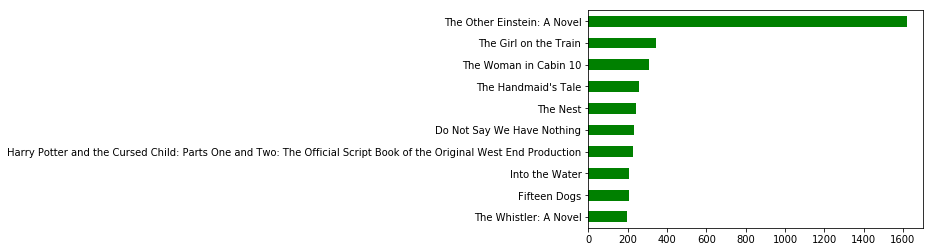

In [33]:
#What are the top 10 most checked out eBook titles?
only_ebooks.Title.value_counts().sort_values(ascending=True).tail(10).plot(kind='barh',color='green')

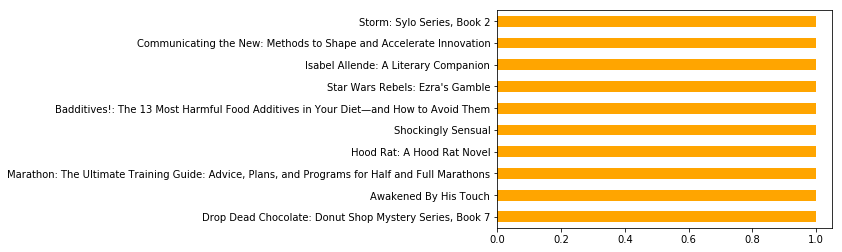

In [34]:
#What are the ten least checked out eBook titles? 
only_ebooks.Title.value_counts().sort_values().head(10).plot(kind='barh', color='orange')

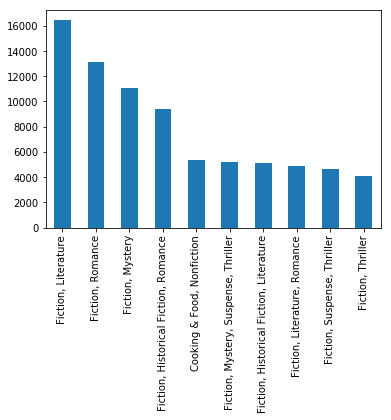

In [35]:
#Most popular genre for ebooks
only_ebooks.Subject.value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

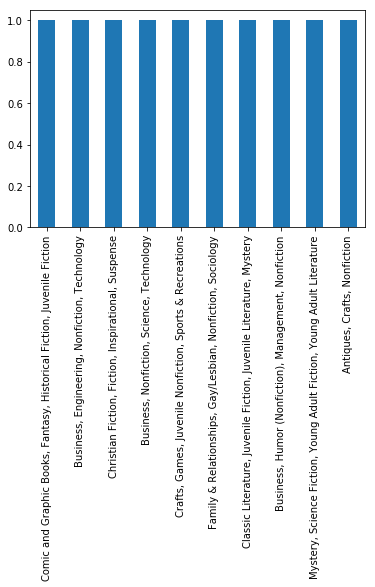

In [36]:
#Least popular genre for ebooks
only_ebooks.Subject.value_counts().tail(10).plot(kind='bar')

In [37]:
#Most popular author in ebooks
only_ebooks.Creator.value_counts().head(5)

Lonely Planet      2106
Marie Benedict     1622
James Patterson    1603
Nora Roberts       1558
John Grisham       1181
Name: Creator, dtype: int64

In [38]:
#The most popular genre for most wards is the same. The exception is Scarborough-Agincourt
only_ebooks.groupby("NAME")['Subject'].value_counts().groupby(level=0).nlargest(1)

/usr/local/lib/python3.6/site-packages/pandas/core/groupby.py:3214: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1
  llab = lambda lab, inc: lab[inc]


IndexError: index 0 is out of bounds for axis 1 with size 0

In [39]:
pd.set_option("display.max_rows", 100)
only_ebooks.dtypes

index                                 int64
Branch No                             int64
Branch Code                          object
LATITUDE                            float64
LONGITUDE                           float64
Machines                            float64
Area                                 object
District                             object
Branch Name                          object
Branch Name 2                        object
Nbhd Tier                            object
Tier                                 object
Youth Hub                            object
Square Footage                      float64
facility_master_id                  float64
Branch Postal Code                   object
FacilityID                          float64
OverDrive Branch                     object
NBHD Name                            object
NBHD No                             float64
City                                 object
NIA2014                             float64
Branch Address                  

In [40]:
#Issue with 'Title' column in that some titles were actually were datetime types
only_ebooks['Title'].astype(str)

0                                            2 Hot 2 Handle
1         The 3 Simple Rules of Investing: Why Everythin...
3         The 4 x 4 Diet: 4 Key Foods, 4-Minute Workouts...
4         The 4 x 4 Diet: 4 Key Foods, 4-Minute Workouts...
5         The 5: 2 Diet: Feast for 5 Days, Fast for 2 Da...
6         The 5: 2 Fast Diet Cookbook: 150 Easy Fat-Burn...
10        7 Strategies for Wealth & Happiness: Power Ide...
12        10 Shades of Seduction: Submit to Desire\Secon...
13        10 Things Employers Want You to Learn in Colle...
14                        The 100 Best Affordable Vacations
15               The 100 Best Vacations to Enrich Your Life
16        The 100 Best Worldwide Vacations to Enrich You...
17                         100 Places Every Woman Should Go
18        100 Things To Do Before You Die: Travel Events...
20        The 100-Year-Old Man Who Climbed Out the Windo...
21        The 100-Year-Old Man Who Climbed Out the Windo...
22        The 100-Year-Old Man Who Climb

In [41]:
#We tried to pull out the titles that have a datetime type and thought to drop them but then thought better to change to string type
from datetime import datetime
#only_ebooks['Title'].unique()
only_ebooks['Title'].apply(lambda x: type(x)).unique()

array([<class 'str'>, <class 'int'>, <class 'datetime.datetime'>,
       <class 'datetime.time'>], dtype=object)

In [42]:
#Top 10 list for each branch
only_ebooks['Title'] = only_ebooks['Title'].astype(str)
only_ebooks.groupby("NAME")['Title'].value_counts().groupby(level=0).nlargest(10)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/pandas/core/groupby.py:3214: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1
  llab = lambda lab, inc: lab[inc]


IndexError: index 0 is out of bounds for axis 1 with size 0

In [43]:
only_ebooks.head(3)

,index,Branch No,Branch Code,LATITUDE,LONGITUDE,Machines,Area,District,Branch Name,Branch Name 2,Nbhd Tier,Tier,Youth Hub,Square Footage,facility_master_id,Branch Postal Code,FacilityID,OverDrive Branch,NBHD Name,NBHD No,City,NIA2014,Branch Address,Branch Telephone,City Councillor 2014-2018,FSA,Prov,RealBranch,Ward No,Ward Region,geometry,index_right,CREATE_ID,GEO_ID,LCODE_NAME,NAME,OBJECTID,SCODE_NAME,SHAPE_AREA,SHAPE_LEN,TYPE_CODE,TYPE_DESC,Title,Edition,Creator,Language,Audience/Rating,Subject,Format,Publisher,Date Added to site,Own,Lic. purchased,Lic. left,Lic. used,Checkout ID,Branch,Checked out,Lending period,Borrowed from,Bought by,Renewal,Content access levels,Barcode,Extra1,Extra2,Extra3,Extra4,Extra5
0,1,1,AG,43.786081,-79.291331,47.0,Agincourt-Barbara Frum-Fairview,Agincourt,Agincourt,Agincourt,District,DL,No,27000.0,4.0,M1T3W6,1024.0,Agincourt (Toronto Public Library),Tam O'Shanter-Sullivan,118.0,Scarborough,0.0,155 Bonis Ave,(416) 396-8943,Norm Kelly,M1T,ON,1,40.0,Scarborough Agincourt,POINT (-79.291331 43.786081),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Hot 2 Handle,NaN,Kelly Jamieson,English,Adult Fiction,"Fiction, Romance",eBook,"Samhain Publishing, Ltd.",2017-02-23,3,-,-,-,243-846338-00459,Agincourt (Toronto Public Library),2017-06-01,21,Main collection,Cons.,No,Adult,27131026255895,NaN,NaN,NaN,NaN,NaN
1,1,1,AG,43.786081,-79.291331,47.0,Agincourt-Barbara Frum-Fairview,Agincourt,Agincourt,Agincourt,District,DL,No,27000.0,4.0,M1T3W6,1024.0,Agincourt (Toronto Public Library),Tam O'Shanter-Sullivan,118.0,Scarborough,0.0,155 Bonis Ave,(416) 396-8943,Norm Kelly,M1T,ON,1,40.0,Scarborough Agincourt,POINT (-79.291331 43.786081),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The 3 Simple Rules of Investing: Why Everythin...,NaN,Michael Edesess,English,Adult Nonfiction,"Business, Finance, Nonfiction",eBook,"Berrett-Koehler Publishers, Inc.",2014-05-09,9,-,-,-,243-747422-00171,Agincourt (Toronto Public Library),2017-06-30,7,Main collection,Cons.,No,Adult,27131017392251,NaN,NaN,NaN,NaN,NaN
3,1,1,AG,43.786081,-79.291331,47.0,Agincourt-Barbara Frum-Fairview,Agincourt,Agincourt,Agincourt,District,DL,No,27000.0,4.0,M1T3W6,1024.0,Agincourt (Toronto Public Library),Tam O'Shanter-Sullivan,118.0,Scarborough,0.0,155 Bonis Ave,(416) 396-8943,Norm Kelly,M1T,ON,1,40.0,Scarborough Agincourt,POINT (-79.291331 43.786081),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The 4 x 4 Diet: 4 Key Foods, 4-Minute Workouts...",NaN,Erin Oprea,English,Adult Nonfiction,"Health & Fitness, Nonfiction, Self-Improvement",eBook,"Random House, Inc.",2016-01-28,4,-,-,-,243-1418466-00156,Agincourt (Toronto Public Library),2017-06-09,21,Main collection,Cons.,No,Adult,27131040500474,NaN,NaN,NaN,NaN,NaN


# Building coropleths on data join between wards and value_counts for genre

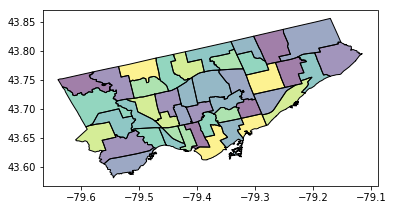

In [44]:
wards.plot()

In [45]:
wards.head(3)

,CREATE_ID,GEO_ID,LCODE_NAME,NAME,OBJECTID,SCODE_NAME,SHAPE_AREA,SHAPE_LEN,TYPE_CODE,TYPE_DESC,geometry
0,63519,14630026,EA41,Scarborough-Rouge River (41),1,41,0.0,0.0,CITW,Ward,POLYGON ((-79.26505436013277 43.77948980747296...
1,63519,14630028,EA44,Scarborough East (44),2,44,0.0,0.0,CITW,Ward,POLYGON ((-79.17097116619559 43.75557000302067...
2,63519,14630024,EA42,Scarborough-Rouge River (42),3,42,0.0,0.0,CITW,Ward,POLYGON ((-79.22588463379613 43.78933660104191...


In [46]:
only_ebooks['NAME'].value_counts()

Series([], Name: NAME, dtype: int64)

In [47]:
#Setting the index column for Wards to be "NAME"
wards.set_index('NAME', inplace=True)
wards.head()

,CREATE_ID,GEO_ID,LCODE_NAME,OBJECTID,SCODE_NAME,SHAPE_AREA,SHAPE_LEN,TYPE_CODE,TYPE_DESC,geometry
NAME,,,,,,,,,,
Scarborough-Rouge River (41),63519,14630026,EA41,1,41,0.0,0.0,CITW,Ward,POLYGON ((-79.26505436013277 43.77948980747296...
Scarborough East (44),63519,14630028,EA44,2,44,0.0,0.0,CITW,Ward,POLYGON ((-79.17097116619559 43.75557000302067...
Scarborough-Rouge River (42),63519,14630024,EA42,3,42,0.0,0.0,CITW,Ward,POLYGON ((-79.22588463379613 43.78933660104191...
Scarborough-Agincourt (39),63519,14630027,EA39,4,39,0.0,0.0,CITW,Ward,POLYGON ((-79.33161155129696 43.79305194915877...
Willowdale (24),63519,14630035,NO24,5,24,0.0,0.0,CITW,Ward,POLYGON ((-79.38739080355791 43.76341495875854...


In [48]:
wards.LCODE_NAME.head()

NAME
Scarborough-Rouge River (41)    EA41
Scarborough East (44)           EA44
Scarborough-Rouge River (42)    EA42
Scarborough-Agincourt (39)      EA39
Willowdale (24)                 NO24
Name: LCODE_NAME, dtype: object

# Coropleth for e-circulation count

In [65]:
wards['ecirculation_count'] = only_ebooks['NAME'].value_counts()
wards

,NAME,CREATE_ID,GEO_ID,LCODE_NAME,OBJECTID,SCODE_NAME,SHAPE_AREA,SHAPE_LEN,TYPE_CODE,TYPE_DESC,geometry,ecirculation_count
0,Scarborough-Rouge River (41),63519,14630026,EA41,1,41,0.0,0.0,CITW,Ward,POLYGON ((-79.26505436013277 43.77948980747296...,NaN
1,Scarborough East (44),63519,14630028,EA44,2,44,0.0,0.0,CITW,Ward,POLYGON ((-79.17097116619559 43.75557000302067...,NaN
2,Scarborough-Rouge River (42),63519,14630024,EA42,3,42,0.0,0.0,CITW,Ward,POLYGON ((-79.22588463379613 43.78933660104191...,NaN
3,Scarborough-Agincourt (39),63519,14630027,EA39,4,39,0.0,0.0,CITW,Ward,POLYGON ((-79.33161155129696 43.79305194915877...,NaN
4,Willowdale (24),63519,14630035,NO24,5,24,0.0,0.0,CITW,Ward,POLYGON ((-79.38739080355791 43.76341495875854...,NaN
5,Scarborough-Agincourt (40),63519,14630029,EA40,6,40,0.0,0.0,CITW,Ward,POLYGON ((-79.31544623572297 43.75781407807433...,NaN
6,Don Valley East (33),63519,14630036,NO33,7,33,0.0,0.0,CITW,Ward,POLYGON ((-79.32008628531609 43.76850793389922...,NaN
7,Willowdale (23),63519,14630037,NO23,8,23,0.0,0.0,CITW,Ward,POLYGON ((-79.40863932466183 43.75375410082944...,NaN
8,York West (8),63519,14630039,NO08,9,08,0.0,0.0,CITW,Ward,POLYGON ((-79.51532265164857 43.74703982159354...,NaN
9,Scarborough Centre (38),63519,14630031,EA38,10,38,0.0,0.0,CITW,Ward,POLYGON ((-79.24828806981071 43.73664086761099...,NaN


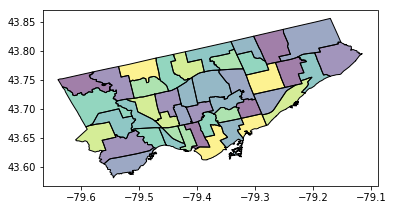

In [50]:
wards.plot()

In [51]:
wards.shape

(44, 11)

In [52]:
#excluding the 2 wards without a library branch
wards_clean = wards[wards['ecirculation_count'].notnull()]

In [53]:
ax = wards_clean.plot(column='ecirculation_count', figsize = (30,50), edgecolor = 'grey', linewidth =2, cmap='summer', legend=True, scheme='Quantiles')
ax.axis('off')
ax.legend(fontsize=16)

plt.savefig('ecirculation_in_wards.pdf')

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/site-packages/pysal/esda/mapclassify.py:702: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


ValueError: zero-size array to reduction operation minimum which has no identity

# Coropleth for most popular genre in each ward

In [54]:
genres = only_ebooks.groupby("NAME")['Subject'].value_counts().groupby(level=0).nlargest(1)
genres

/usr/local/lib/python3.6/site-packages/pandas/core/groupby.py:3214: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1
  llab = lambda lab, inc: lab[inc]


IndexError: index 0 is out of bounds for axis 1 with size 0

In [55]:
genres.shape

NameError: name 'genres' is not defined

In [56]:
only_ebooks["NAME"].value_counts()

Series([], Name: NAME, dtype: int64)

In [57]:
#Turn genres into a data frame
genres = genres.to_frame()

NameError: name 'genres' is not defined

In [58]:
#Reset my index to level 0 
genres = genres.reset_index(level=0)

NameError: name 'genres' is not defined

In [59]:
#Rename my columns
genres = genres.rename(columns={'Subject':'count'})

NameError: name 'genres' is not defined

In [60]:
#Reset 
genres = genres.reset_index(level=1)

NameError: name 'genres' is not defined

In [61]:
genres.head()

NameError: name 'genres' is not defined

In [62]:
wards

,CREATE_ID,GEO_ID,LCODE_NAME,OBJECTID,SCODE_NAME,SHAPE_AREA,SHAPE_LEN,TYPE_CODE,TYPE_DESC,geometry,ecirculation_count
NAME,,,,,,,,,,,
Scarborough-Rouge River (41),63519,14630026,EA41,1,41,0.0,0.0,CITW,Ward,POLYGON ((-79.26505436013277 43.77948980747296...,NaN
Scarborough East (44),63519,14630028,EA44,2,44,0.0,0.0,CITW,Ward,POLYGON ((-79.17097116619559 43.75557000302067...,NaN
Scarborough-Rouge River (42),63519,14630024,EA42,3,42,0.0,0.0,CITW,Ward,POLYGON ((-79.22588463379613 43.78933660104191...,NaN
Scarborough-Agincourt (39),63519,14630027,EA39,4,39,0.0,0.0,CITW,Ward,POLYGON ((-79.33161155129696 43.79305194915877...,NaN
Willowdale (24),63519,14630035,NO24,5,24,0.0,0.0,CITW,Ward,POLYGON ((-79.38739080355791 43.76341495875854...,NaN
Scarborough-Agincourt (40),63519,14630029,EA40,6,40,0.0,0.0,CITW,Ward,POLYGON ((-79.31544623572297 43.75781407807433...,NaN
Don Valley East (33),63519,14630036,NO33,7,33,0.0,0.0,CITW,Ward,POLYGON ((-79.32008628531609 43.76850793389922...,NaN
Willowdale (23),63519,14630037,NO23,8,23,0.0,0.0,CITW,Ward,POLYGON ((-79.40863932466183 43.75375410082944...,NaN
York West (8),63519,14630039,NO08,9,08,0.0,0.0,CITW,Ward,POLYGON ((-79.51532265164857 43.74703982159354...,NaN


In [63]:
wards = wards.reset_index()

In [64]:
wards_with_genres = wards.merge(genres, on="NAME")
wards_with_genres

NameError: name 'genres' is not defined

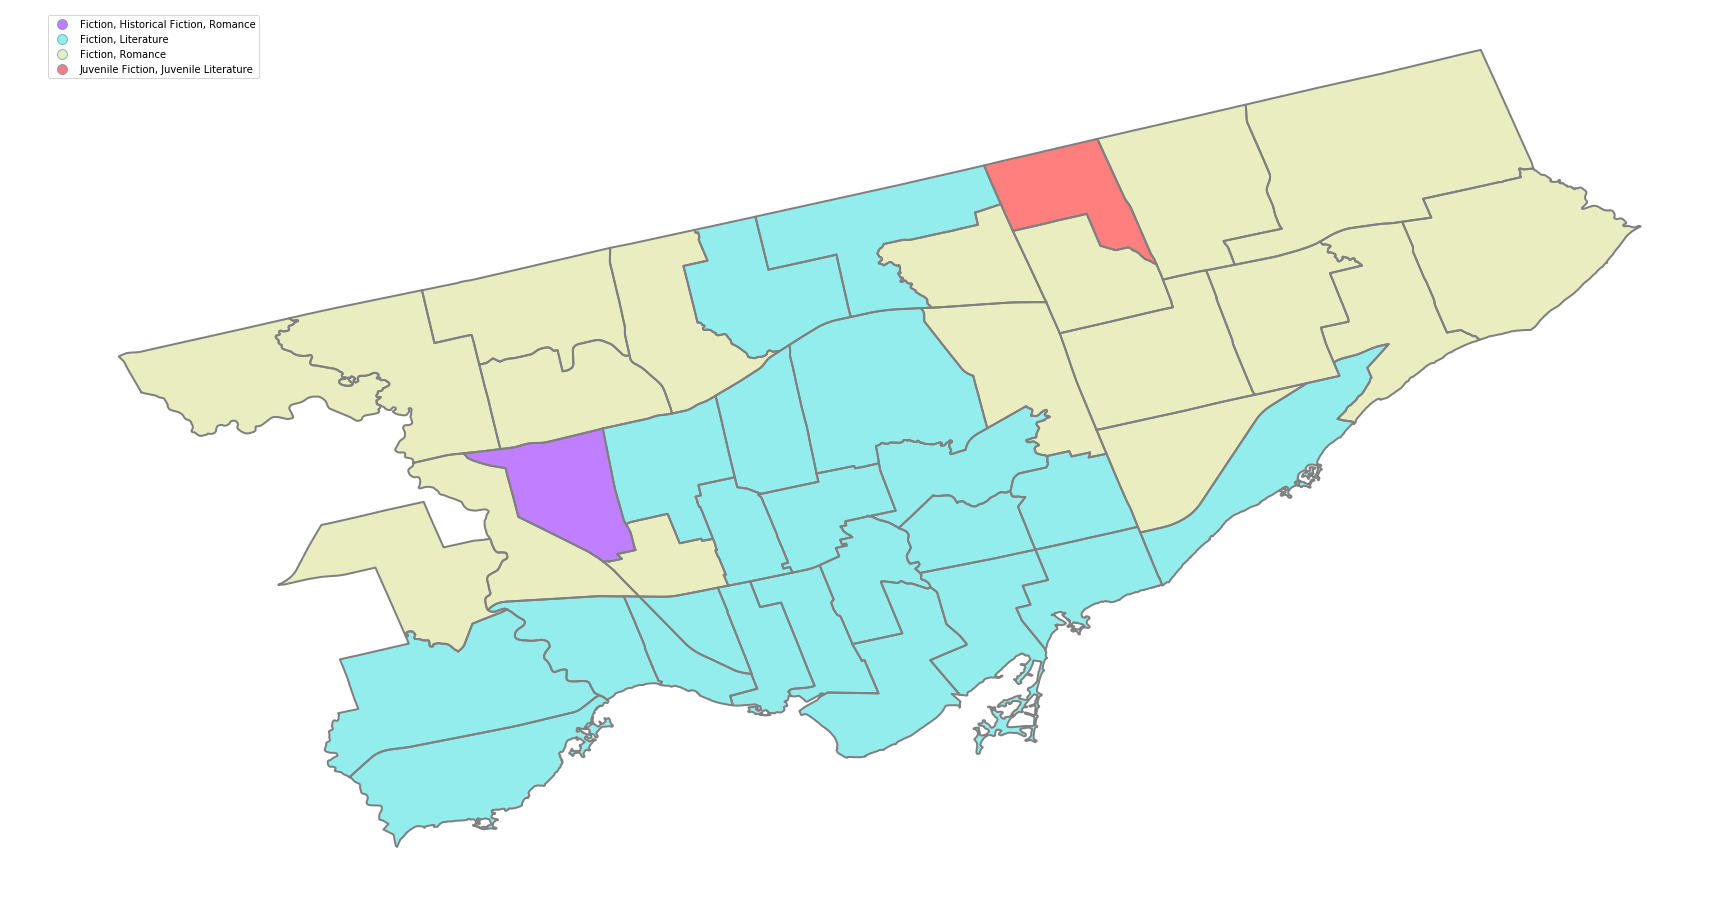

In [86]:
ax = wards_with_genres.plot(column='Subject', figsize = (30,50), edgecolor = 'grey', linewidth =2, cmap='rainbow', legend=True)
ax.axis('off')
plt.savefig('popular_genres_in_wards.pdf')

In [87]:
wards_with_genres.groupby('NAME').sum()

,CREATE_ID,GEO_ID,OBJECTID,SHAPE_AREA,SHAPE_LEN,ecirculation_count,count
NAME,,,,,,,
Beaches-East York (31),63519,14630013,30,0.0,0.0,5222.0,331
Beaches-East York (32),63519,14630016,29,0.0,0.0,8830.0,719
Davenport (17),66055,14653066,326,0.0,0.0,1738.0,131
Davenport (18),63519,14630056,36,0.0,0.0,4823.0,389
Don Valley East (33),63519,14630036,7,0.0,0.0,7375.0,523
Don Valley East (34),63519,14630041,12,0.0,0.0,2514.0,153
Don Valley West (25),63519,14630010,13,0.0,0.0,11777.0,905
Don Valley West (26),63519,14630012,23,0.0,0.0,7059.0,599
Eglinton-Lawrence (15),63519,14630019,21,0.0,0.0,6980.0,505


# Coropleth for most popular book in each ward

In [115]:
only_ebooks['Title'] = only_ebooks['Title'].astype(str)
titles = only_ebooks.groupby("NAME")['Title'].value_counts().groupby(level=0).nlargest(1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/pandas/core/groupby.py:3214: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1
  llab = lambda lab, inc: lab[inc]


IndexError: index 0 is out of bounds for axis 1 with size 0

In [ ]:
titles = titles.to_frame()

In [ ]:
titles

In [ ]:
titles = titles.rename(columns={'Title':'count'})
titles.head()

In [ ]:
titles = titles.reset_index(level=1)

In [ ]:
titles.index

In [ ]:
titles.columns

In [ ]:
titles

In [ ]:
wards

In [ ]:
wards_with_titles = wards.merge(titles, on='NAME')

In [ ]:
wards_with_titles

In [116]:
ax = wards_with_titles.plot(column='Title', figsize = (30,50), edgecolor = 'grey', linewidth =2, cmap='viridis', legend=True)
ax.axis('off')
plt.legend(fontsize=12)
plt.savefig('popular_ebooks_in_wards.pdf')

NameError: name 'wards_with_titles' is not defined